# Assignment 4

## Using Dataset 5

In [96]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns
import itertools
import os
import math

In [11]:
facebook_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Facebook-Ego/686.edges"
twitter_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Twitter-Ego/1435461.edges"

In [12]:
# Load the /.edges files
# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [13]:
# Basic attributes check
print("Number of nodes={}, edges={} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes={}, edges={} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes=168, edges=1656 in facebook graph.
Number of nodes=129, edges=8037 in Twitter graph.


## Question A

### Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the lecture on all of the nodes. Please compare the results. What cause the difference between the results?

In [39]:
# Function to plot tables
def plot_table(data, columns, target, id, widths):
    plt.rcdefaults()
    #plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    
    ax.set_axis_off()
    ax.table(
        cellText=data,
        colLabels=columns,
        cellLoc='center',
        loc='upper center',
        colWidths=widths,
        colColours=['gray', 'gray']
    )
    ax.set_title('Table showing {} of all Nodes in {}'.format(target, id), fontweight='bold')
    plt.savefig(target + '_' + id + '.png',
                transparent=False,
                bbox_inches='tight')
    plt.show()

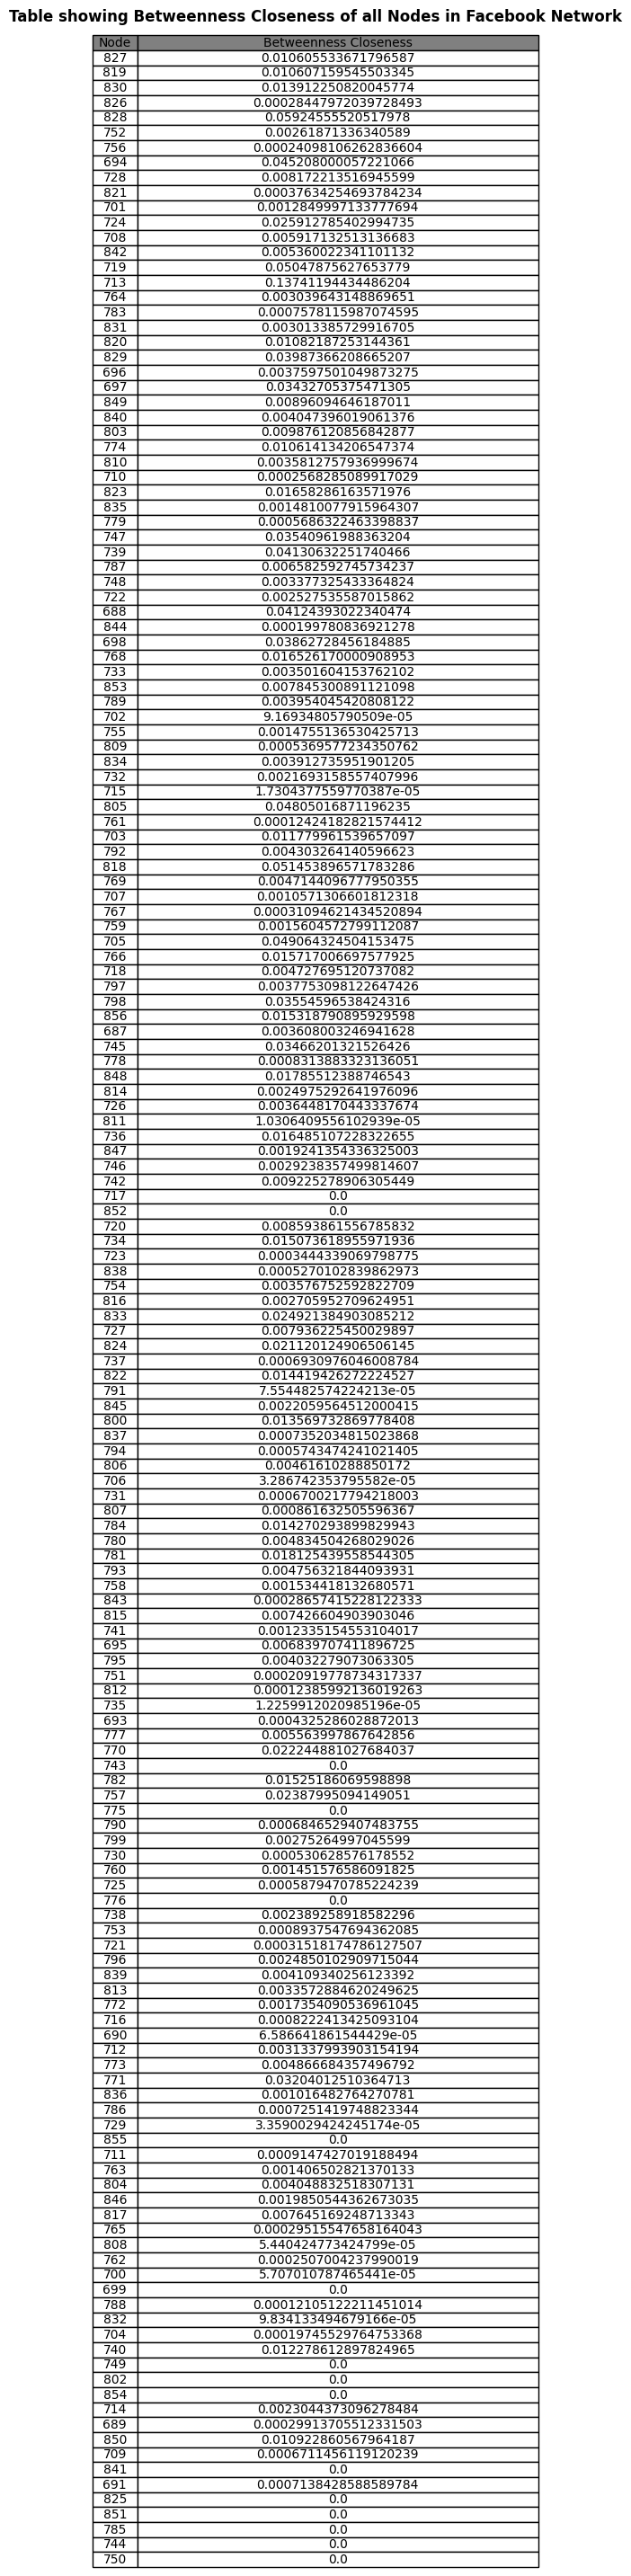

In [40]:
# Making use of the Facebook-Ego dataset

# Betweenness Closeness (Not Nornamlized) of all Nodes
Betweenness_Closeness_Facebook = nx.betweenness_centrality(G=graphFacebook)

# Get 2D list of each Node and the betweenness closeness to be used to plot a table
dataBC = [[key, str(value)] for key, value in Betweenness_Closeness_Facebook.items()]
columnsBC = ['Node', 'Betweenness Closeness']
widths=[0.1,0.9]


# Plot table
plot_table(data=dataBC,
           columns=columnsBC,
           target='Betweenness Closeness',
           id='Facebook Network',
           widths=widths)

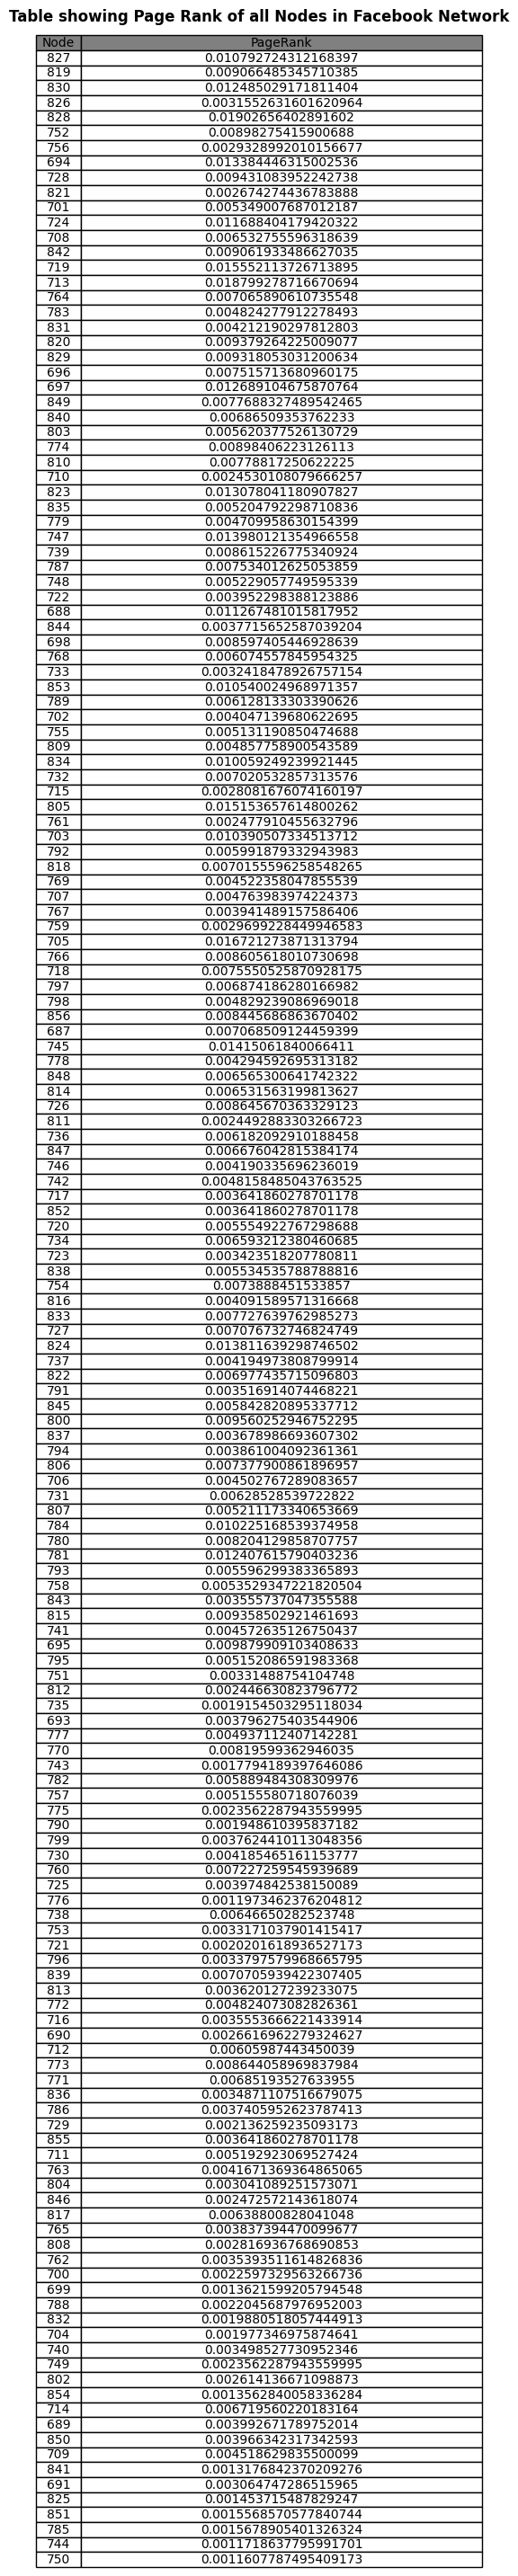

In [41]:
# Making use of the Facebook-Ego dataset

# PageRank of all Nodes
pageRankFb = nx.pagerank(graphFacebook)

# Get 2D list of each Node and the betweenness closeness to be used to plot a table
dataPR = [[key, str(value)] for key, value in pageRankFb.items()]
columnsPR = ['Node', 'PageRank']
widths=[0.1,0.9]


# Plot table
plot_table(data=dataPR,
           columns=columnsPR,
           target='Page Rank',
           id='Facebook Network',
           widths=widths)

## Question C

### Plot the largest strong connected component in the Twitter-Ego dataset

In [69]:
# To plot a graph structure

def plot_graph_structure(G, id):
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.set_title("{} graph structure".format(id), 
                     pad=15, color='#333333',weight='bold')
    ax.set_facecolor('white')
    nx.draw_networkx(G, node_size=10, with_labels=False, arrowstyle='-', arrowsize=1, node_color='black', edge_color='lightgray')
    fig.tight_layout()
    plt.savefig("{} Graph Structure.png".format(id), transparent=False)
    return

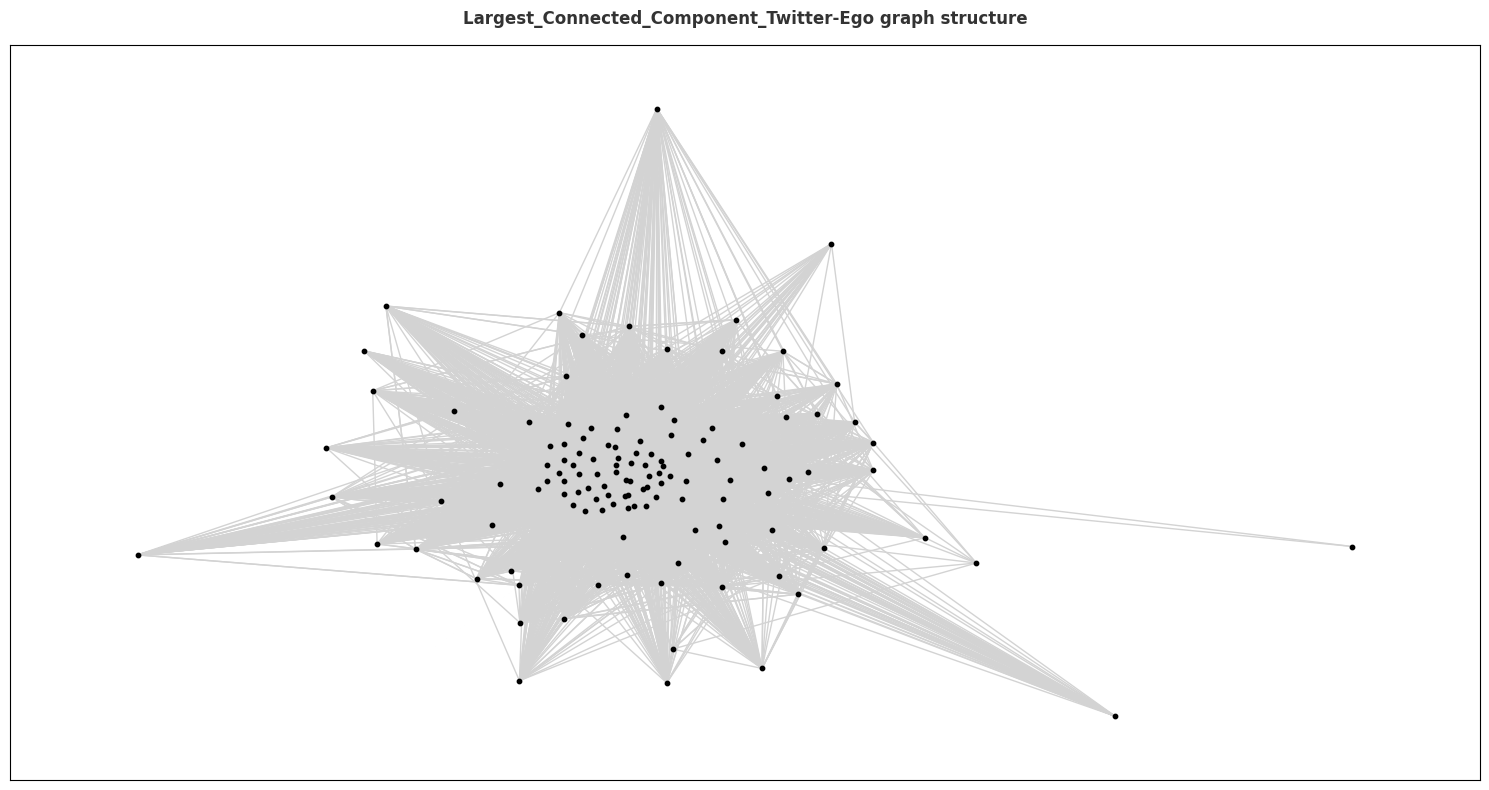

In [70]:
# For Twitther the directed graph
largest_cc_twitter = max(nx.strongly_connected_components(graphTwitter), key=len)

induced_subgraph = graphTwitter.subgraph(largest_cc_twitter).copy()

# Plot the largest connected component
plot_graph_structure(induced_subgraph, 'Largest_Connected_Component_Twitter-Ego')

## Question D

### Choose the results of one of the two algorithms mentioned in question (a), and choose the node with the highest value and the node with lowest value. Please plot the distributions of Jaccard similarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph

In [60]:
# I will use the result from the betweeness closeness algorithm

# Find nodes with highest and lowest values
print("Using the result from the BETWEENNESS CLOSENESS algorithm in Question A \n")

max_BC = max(zip(Betweenness_Closeness_Facebook.values(), Betweenness_Closeness_Facebook.keys()))
min_BC = min(zip(Betweenness_Closeness_Facebook.values(), Betweenness_Closeness_Facebook.keys()))

print("Maximum betweenness closeness value and node are: {}".format(max_BC))
print("Minimum betweenness closeness value and node are: {}".format(min_BC))

Using the result from the BETWEENNESS CLOSENESS algorithm in Question A 

Maximum betweenness closeness value and node are: (0.13741194434486204, '713')
Minimum betweenness closeness value and node are: (0.0, '699')


In [110]:
def plot_distribution(values, id, col):
    """_summary_
    Returns plot of degree distribution and saves the plot to the system
    """
    plt.rcdefaults()
    plt.rcParams['figure.figsize'] = (15, 8)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')
    ax.hist(values, color=col, bins=10)
    
    # Beautify the plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_color('#DDDDDD')
    ax.spines['bottom'].set_linewidth(2.5)

    # Remove axis ticks.
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    
    ax.set_ylabel("Count", labelpad=15, color='#333333')
    ax.set_xlabel(id, labelpad=15, color='#333333')
    ax.set_title("Distribution of {}".format(id), pad=15, color='#333333',
             weight='bold')
    ax.margins(0)
    
    fig.tight_layout()
    plt.savefig('{}_Distribution.png'.format(id), transparent=False)
    return

In [71]:
# Node with the maximum betweenness closeness
node_i = max_BC[1]

# Combination of the above node with the rest of the nodes in the Facebook Network
node_pairs = [(node_i, j) for j in list(graphFacebook.nodes) if node_i != j]

### Jaccard coefficient

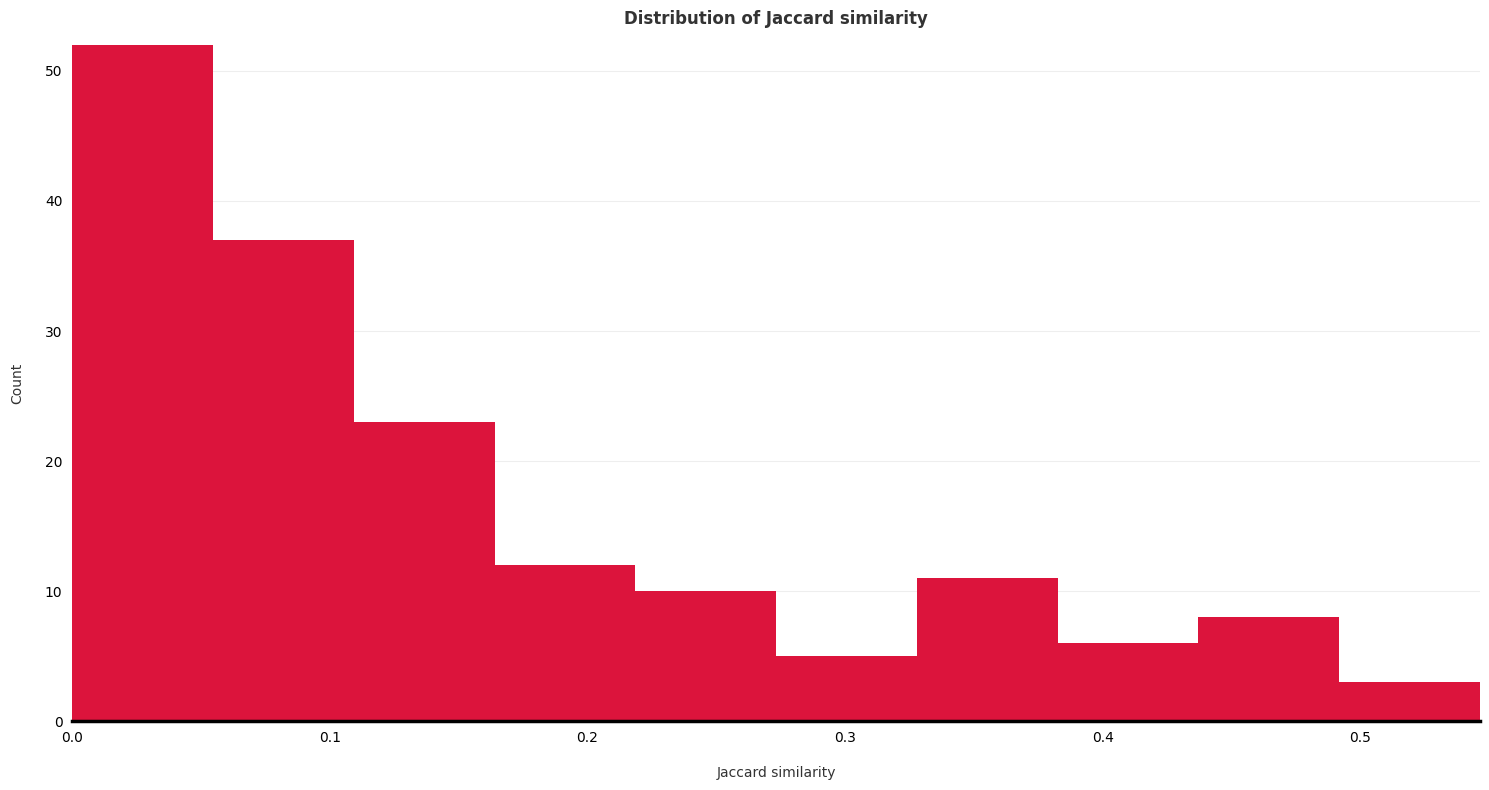

In [113]:
# nx.jaccard_coefficient returns an iterator of 3-tuples in the form (u, v, p) 
# where (u, v) is a pair of nodes and p is their Jaccard coefficient.
jaccard_sim = nx.jaccard_coefficient(graphFacebook, node_pairs)

# Plot distribution of Jaccard similarity
plot_distribution([p for _,_,p in jaccard_sim], 'Jaccard similarity', 'crimson')

### Cosine similarity

In [104]:
# Cosine similarity
def cosine_similarity(node_pairs):
    """
    I use the formula s(i,j) = |Ni n Nj| / sqrt(|Ni||Nj|)
    where Ni refers to the Neighbors of node i
    Args:
        node_pairs (_type_): Combination of the node with the maximum betweenness closeness with the rest 
        of the nodes in the Facebook Network
    Returns: an iterator of 3-tuples in the form (i, j, c) 
            where (i, j) is a pair of nodes and c is their cosine similarity.
    """
    for node_i, node_j in node_pairs:
        # Number of common neighbors
        number_common_neighbors = len(list(nx.common_neighbors(graphFacebook, node_i, node_j)))
        
        # Number of neighbors of node i
        number_neighbors_i = len(list(graphFacebook.neighbors(node_i)))
        
        # Number of neighbors of node j
        number_neighbors_j = len(list(graphFacebook.neighbors(node_j)))
        
        # Geometric mean
        geometric_mean = math.sqrt(number_neighbors_i*number_neighbors_j)
        
        #cosine similarity
        cos_sim = number_common_neighbors/geometric_mean
        
        yield node_i, node_j, cos_sim

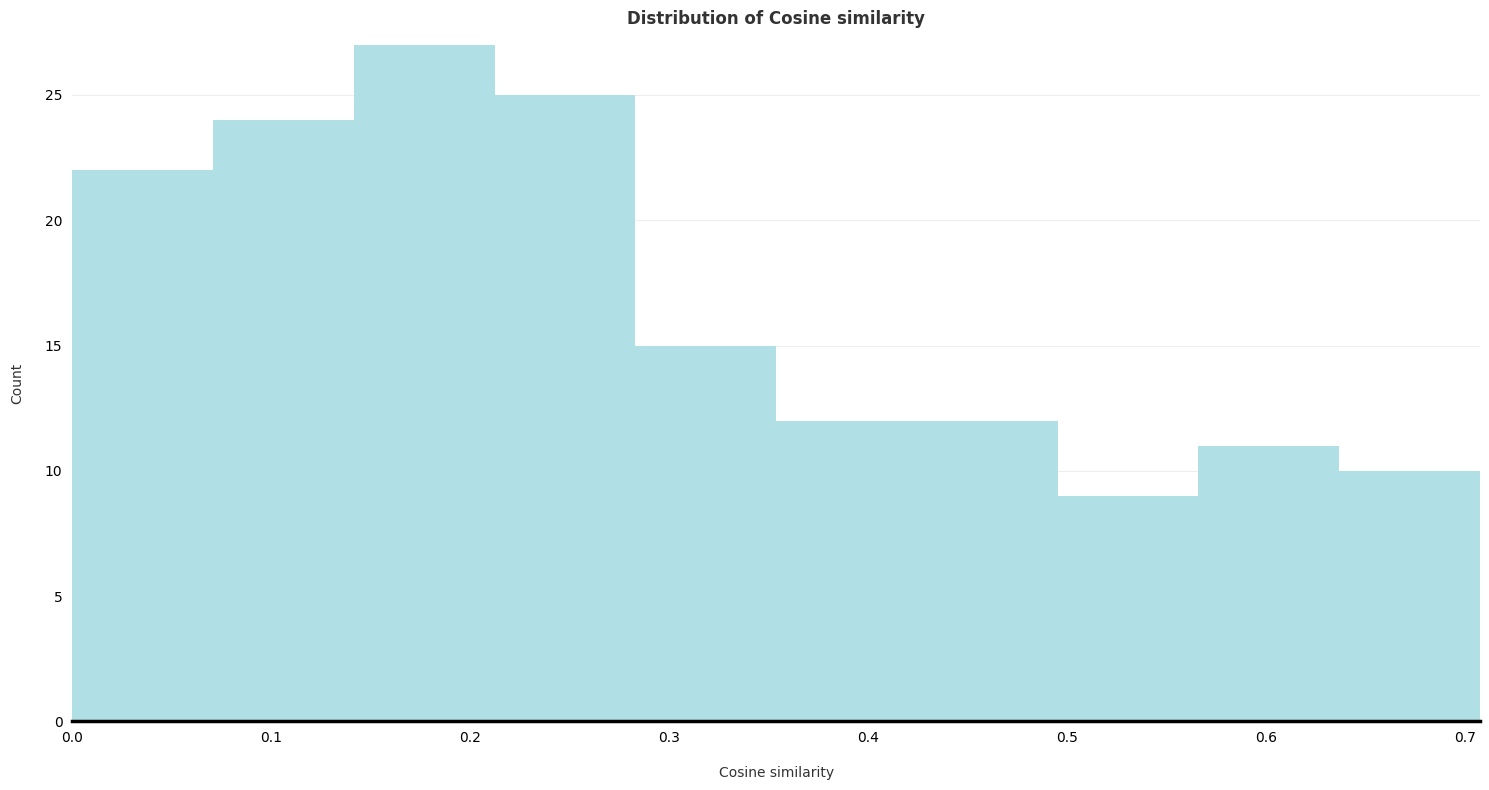

In [114]:
# Calculate cosine similarity
cosine_sim = cosine_similarity(node_pairs=node_pairs)

# Plot distribution of cosine similarity
plot_distribution([c for _,_,c in cosine_sim], 'Cosine similarity', 'powderblue')

### Euclidean distance

In [107]:
def euclidean_distance(node_pairs):
    """
    I use the formula d(i,j) = 1 - 2(|Ni n Nj| / |Ni| + |Nj|)
    where Ni refers to the Neighbors of node i
    Args:
        node_pairs (_type_): Combination of the node with the maximum betweenness closeness with the rest 
        of the nodes in the Facebook Network
    Returns: an iterator of 3-tuples in the form (i, j, d) 
            where (i, j) is a pair of nodes and d is the euclidean distance.
    """
    for node_i, node_j in node_pairs:
        # Number of common neighbors
        number_common_neighbors = len(list(nx.common_neighbors(graphFacebook, node_i, node_j)))
        
        # Number of neighbors of node i
        number_neighbors_i = len(list(graphFacebook.neighbors(node_i)))
        
        # Number of neighbors of node j
        number_neighbors_j = len(list(graphFacebook.neighbors(node_j)))
        
        # Geometric mean
        sum_neighbors_ij = number_neighbors_i + number_neighbors_j
        
        #cosine similarity
        eucli_dist = 1 - (2*(number_common_neighbors/sum_neighbors_ij))
        
        yield node_i, node_j, eucli_dist

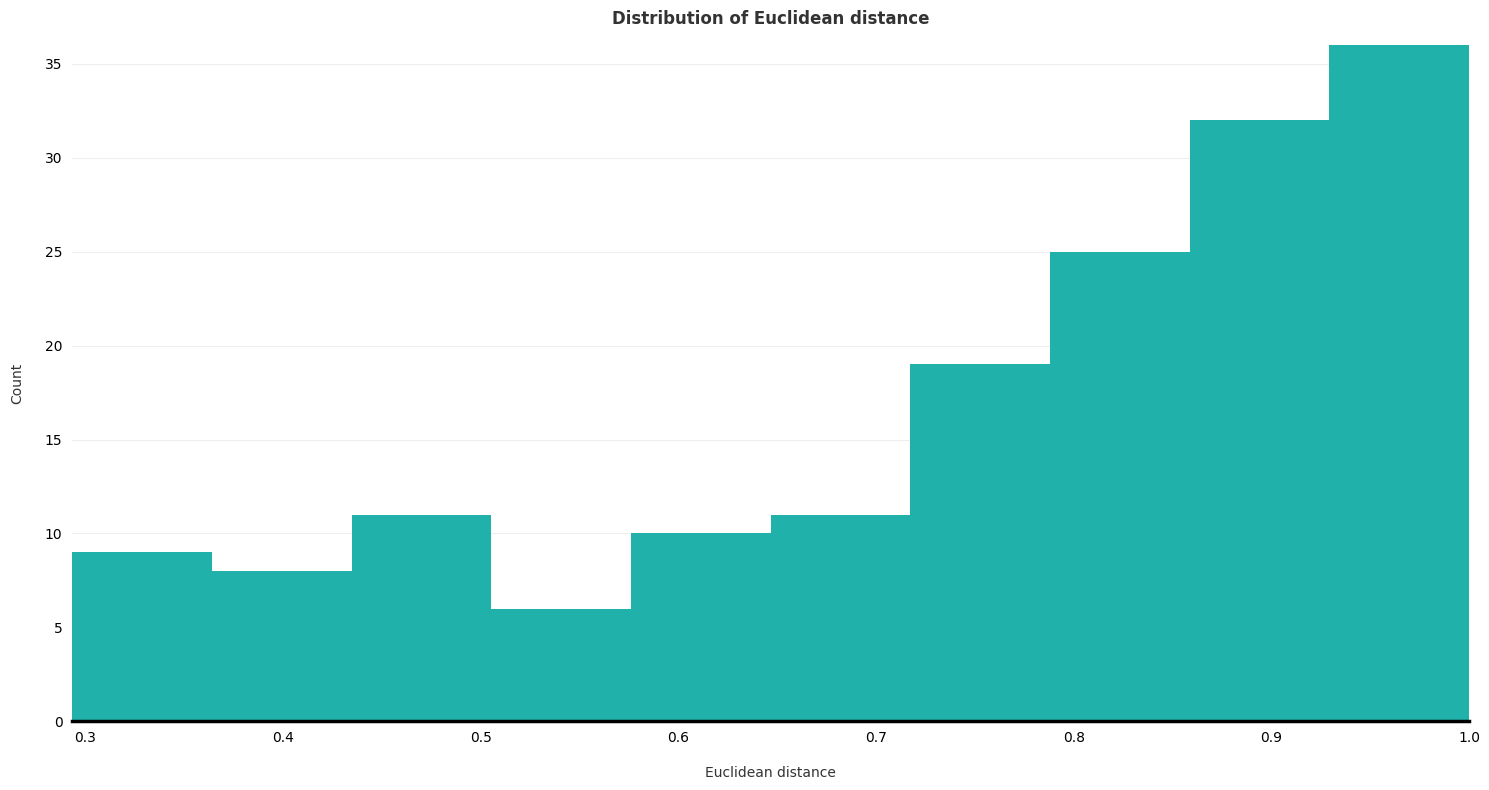

In [111]:
# calculate euclidean distance
eucli_distance = euclidean_distance(node_pairs=node_pairs)

# Plot the distribution
plot_distribution([e for _,_,e in eucli_distance], 'Euclidean distance', 'lightseagreen')